In [1]:
import pandas as pd

In [3]:
# import dataset
df = pd.read_csv('https://raw.githubusercontent.com/Ahmed9667/Alayta-Bank-/refs/heads/main/alayta_bank_data.csv')
df

,CustomerID,CustomerName,LoanID,LoanAmount,LoanInterestRate,LoanDuration,LoanStartDate,OfficerID,OfficerName,OfficerPhone,OfficerEmail,BranchID,BranchName,BranchAddress,PaymentID,PaymentDate,PaymentAmount,TransactionID,TransactionDate,TransactionType
0,88,Nicole Pena,148,6723.11,8.24,24 months,2022-09-24,7,Katherine Dennis,999.798.3635x80775,jessewalker@example.net,11,Shaw Ltd,USCGC Whitney\nFPO AP 34274,4028,2024-01-17,405.12,4873,2024-01-17,Principal Payment
1,434,Matthew Holmes,200,27375.26,4.35,36 months,2023-10-04,31,Angela Bennett,+1-242-684-4907,cody43@example.net,7,Castillo-Bell,"358 Connie Fort Apt. 573\nKimchester, ME 83801",1453,2024-03-01,2619.69,5876,2024-03-01,Interest Payment
2,64,Christian Blair,412,30519.88,4.10,48 months,2022-12-22,35,Chad Walker,(816)957-8642x934,samanthaphillips@example.org,7,"Harris, Randolph and Johns",USS Sullivan\nFPO AP 14466,5478,2023-11-26,2882.62,7023,2023-11-26,Interest Payment
3,430,James Allen,300,38167.50,8.14,36 months,2020-05-01,10,Daniel Holmes,9538673266,patricksimmons@example.org,19,"Hayes, Wilson and Taylor","24435 Gomez Ville\nNew Christinaborough, GU 54053",5335,2023-11-29,418.59,4580,2023-11-29,Interest Payment
4,57,Kristin Reyes,33,11355.12,4.16,48 months,2020-01-23,1,Francisco Barton,570-874-2272x9540,brianwade@example.net,2,Brown Group,"7573 Cassidy Ports\nDanielview, DE 97424",3527,2022-02-17,128.40,2016,2022-02-17,Loan Payment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,223,Annette Lawrence,496,3283.38,5.34,48 months,2024-04-20,22,Heather Miller,(908)378-3129x7817,karen53@example.net,7,Pena and Sons,"3474 Scott Land\nJamieburgh, CA 92276",5895,2024-07-28,128.96,5378,2024-07-28,Principal Payment
996,426,Kristen Rogers,22,36788.38,6.24,60 months,2020-09-26,43,Brittany Richardson,417.977.9923x2999,veronicapalmer@example.com,13,Brock Inc,"201 Harrell Fork\nJochester, NM 52517",6304,2021-04-16,1072.20,6427,2021-04-16,Principal Payment
997,148,Paul Garcia,624,46452.34,11.28,24 months,2021-02-21,9,Allison Young,4366517460,wkramer@example.org,16,Sutton PLC,"8067 Atkinson Highway Suite 556\nCourtneyview,...",9462,2024-01-03,1471.52,9484,2024-01-03,Principal Payment
998,109,Tina Campbell,772,43909.25,11.47,48 months,2023-09-21,14,Sheri Davila,(998)356-4003x718,mdaniel@example.net,12,"Stokes, Martin and Griffin","635 Laura Crossroad\nLake George, ND 85907",7661,2024-07-19,3514.82,599,2024-07-19,Loan Payment


In [5]:
df.columns

Index(['CustomerID', 'CustomerName', 'LoanID', 'LoanAmount',
       'LoanInterestRate', 'LoanDuration', 'LoanStartDate', 'OfficerID',
       'OfficerName', 'OfficerPhone', 'OfficerEmail', 'BranchID', 'BranchName',
       'BranchAddress', 'PaymentID', 'PaymentDate', 'PaymentAmount',
       'TransactionID', 'TransactionDate', 'TransactionType'],
      dtype='object')

## Convert Denormalized to 1NF

- Each `ID column` must have unique records
- Create a composite key of `'CustomerID'` , `'LoanID'` to ensure uniqueness

In [9]:
for i in ['CustomerID','LoanID','OfficerID','BranchID','PaymentID','TransactionID']:
    print(df[i].value_counts())
    print('\n')

CustomerID
469    7
324    7
47     6
375    6
69     6
      ..
217    1
479    1
258    1
387    1
474    1
Name: count, Length: 435, dtype: int64


LoanID
219    6
281    5
742    5
541    4
923    4
      ..
323    1
19     1
43     1
849    1
165    1
Name: count, Length: 634, dtype: int64


OfficerID
44    29
2     27
16    25
10    25
25    25
40    25
8     25
9     24
49    24
12    24
26    23
29    23
3     23
14    23
34    22
5     22
20    22
35    22
18    21
37    21
45    21
39    21
1     21
19    20
42    20
33    20
7     20
31    20
22    20
4     20
23    20
38    19
47    18
13    18
50    18
48    18
11    18
24    17
21    17
6     17
43    16
28    16
30    16
36    16
15    15
46    15
27    14
41    13
32    12
17     9
Name: count, dtype: int64


BranchID
15    62
8     59
2     59
13    58
14    58
12    57
11    55
4     52
18    52
6     51
7     51
1     50
5     47
20    45
3     45
17    42
19    42
16    40
9     38
10    37
Name: count, dtype: int64

It is clear that the records are NOT unique and have to be ranged in a sequence

## Convert 1NF to 2NF

#### Create table in 2NF structure as :
- customers Table >>   CustomerID(PK), CustomerName
- loans table     >>   LoanID(PK), CustomerID(FK), LoanAmount, LoanInterestRate, LoanDuration, LoanStartDate,OfficerID(FK)
- officers table  >>   OfficerID(PK), OfficerName, OfficerPhone, OfficerEmail, BranchID(FK)
- branch table    >>   BranchID(PK), BranchName, BranchAddress
- payments table  >>   PaymentID(PK), LoanID(FK), PaymentDate, PaymentAmount
- transactions table >>TransactionID(PK), LoanID(FK), TransactionDate, TransactionType

In [14]:
# create table customers
customers = df[['CustomerID', 'CustomerName']]
#drop column customerid
customers = customers.drop(columns = 'CustomerID')

#create column customerid
customers['CustomerID'] = range(1, len(df)+1 )
customers

,CustomerName,CustomerID
0,Nicole Pena,1
1,Matthew Holmes,2
2,Christian Blair,3
3,James Allen,4
4,Kristin Reyes,5
...,...,...
995,Annette Lawrence,996
996,Kristen Rogers,997
997,Paul Garcia,998
998,Tina Campbell,999


In [16]:
# move column CustomerID to the first position
customers = customers[['CustomerID'] + [x for x in customers.columns if x != 'CustomerID']  ]
customers

,CustomerID,CustomerName
0,1,Nicole Pena
1,2,Matthew Holmes
2,3,Christian Blair
3,4,James Allen
4,5,Kristin Reyes
...,...,...
995,996,Annette Lawrence
996,997,Kristen Rogers
997,998,Paul Garcia
998,999,Tina Campbell


In [146]:
# create loans table >> LoanID(PK), CustomerID(FK), LoanAmount, LoanInterestRate, LoanDuration, LoanStartDate,OfficerID(FK)
loans = df[['CustomerID', 'LoanAmount','LoanInterestRate', 'LoanDuration', 'LoanStartDate']].copy().drop_duplicates().reset_index(drop= True)

loans = df.merge(loans ,on = [ 'LoanAmount','CustomerID','LoanInterestRate', 'LoanDuration', 'LoanStartDate'],how='inner')\
       [['LoanID','CustomerID', 'LoanAmount','LoanInterestRate', 'LoanDuration', 'LoanStartDate','OfficerID']]

loans

,LoanID,CustomerID,LoanAmount,LoanInterestRate,LoanDuration,LoanStartDate,OfficerID
0,148,88,6723.11,8.24,24 months,2022-09-24,7
1,200,434,27375.26,4.35,36 months,2023-10-04,31
2,412,64,30519.88,4.10,48 months,2022-12-22,35
3,300,430,38167.50,8.14,36 months,2020-05-01,10
4,33,57,11355.12,4.16,48 months,2020-01-23,1
...,...,...,...,...,...,...,...
995,496,223,3283.38,5.34,48 months,2024-04-20,22
996,22,426,36788.38,6.24,60 months,2020-09-26,43
997,624,148,46452.34,11.28,24 months,2021-02-21,9
998,772,109,43909.25,11.47,48 months,2023-09-21,14


In [148]:
loans = loans.drop(columns = 'LoanID')
loans['LoanID'] = range(1 , len(loans) + 1 )
loans = loans[['LoanID'] + [x for x in loans.columns if x != 'LoanID']]
loans.head(5)

,LoanID,CustomerID,LoanAmount,LoanInterestRate,LoanDuration,LoanStartDate,OfficerID
0,1,88,6723.11,8.24,24 months,2022-09-24,7
1,2,434,27375.26,4.35,36 months,2023-10-04,31
2,3,64,30519.88,4.10,48 months,2022-12-22,35
3,4,430,38167.50,8.14,36 months,2020-05-01,10
4,5,57,11355.12,4.16,48 months,2020-01-23,1


In [150]:
print(loans['LoanID'].duplicated().any())
print(loans['CustomerID'].duplicated().any())
print(loans['OfficerID'].duplicated().any())

False
True
True


- Column LoanID is a unique primary key
- Column CustomerID is a primary Key
- Column OfficerID is a foreign key

In [64]:
# Create officers table >> OfficerID(PK), OfficerName, OfficerPhone, OfficerEmail, BranchID(FK)
officers = df[['OfficerID','OfficerName', 'OfficerPhone', 'OfficerEmail']]
officers = df.merge(officers , on=['OfficerID',
       'OfficerName', 'OfficerPhone', 'OfficerEmail'],how='inner')\
       [['OfficerID','OfficerName', 'OfficerPhone', 'OfficerEmail', 'BranchID']]
officers

,OfficerID,OfficerName,OfficerPhone,OfficerEmail,BranchID
0,7,Katherine Dennis,999.798.3635x80775,jessewalker@example.net,11
1,31,Angela Bennett,+1-242-684-4907,cody43@example.net,7
2,35,Chad Walker,(816)957-8642x934,samanthaphillips@example.org,7
3,10,Daniel Holmes,9538673266,patricksimmons@example.org,19
4,1,Francisco Barton,570-874-2272x9540,brianwade@example.net,2
...,...,...,...,...,...
995,22,Heather Miller,(908)378-3129x7817,karen53@example.net,7
996,43,Brittany Richardson,417.977.9923x2999,veronicapalmer@example.com,13
997,9,Allison Young,4366517460,wkramer@example.org,16
998,14,Sheri Davila,(998)356-4003x718,mdaniel@example.net,12


In [68]:
officers = officers.drop(columns = 'OfficerID')
officers['OfficerID'] = range(1 , len(df)+1 )
officers = officers[['OfficerID'] + [x for x in officers.columns if x != 'OfficerID'] ]
officers.head(5)

,OfficerID,OfficerName,OfficerPhone,OfficerEmail,BranchID
0,1,Katherine Dennis,999.798.3635x80775,jessewalker@example.net,11
1,2,Angela Bennett,+1-242-684-4907,cody43@example.net,7
2,3,Chad Walker,(816)957-8642x934,samanthaphillips@example.org,7
3,4,Daniel Holmes,9538673266,patricksimmons@example.org,19
4,5,Francisco Barton,570-874-2272x9540,brianwade@example.net,2


In [80]:
print(officers['OfficerID'].duplicated().any())
print(officers['BranchID'].duplicated().any())

False
True


- Column OfficersID is a unique primary key 
- column BranchID is a foreign key

In [90]:
# create branch table >> BranchID(PK), BranchName, BranchAddress
branch = df[['BranchName','BranchAddress']].copy().drop_duplicates().reset_index(drop= True)
branch['BranchID'] = range(1 , len(branch)+1 )
branch

,BranchName,BranchAddress,BranchID
0,Shaw Ltd,USCGC Whitney\nFPO AP 34274,1
1,Castillo-Bell,"358 Connie Fort Apt. 573\nKimchester, ME 83801",2
2,"Harris, Randolph and Johns",USS Sullivan\nFPO AP 14466,3
3,"Hayes, Wilson and Taylor","24435 Gomez Ville\nNew Christinaborough, GU 54053",4
4,Brown Group,"7573 Cassidy Ports\nDanielview, DE 97424",5
...,...,...,...
995,Pena and Sons,"3474 Scott Land\nJamieburgh, CA 92276",996
996,Brock Inc,"201 Harrell Fork\nJochester, NM 52517",997
997,Sutton PLC,"8067 Atkinson Highway Suite 556\nCourtneyview,...",998
998,"Stokes, Martin and Griffin","635 Laura Crossroad\nLake George, ND 85907",999


In [92]:
branch = branch[['BranchID'] + [x for x in branch.columns if x != 'BranchID'] ]
branch.head()

,BranchID,BranchName,BranchAddress
0,1,Shaw Ltd,USCGC Whitney\nFPO AP 34274
1,2,Castillo-Bell,"358 Connie Fort Apt. 573\nKimchester, ME 83801"
2,3,"Harris, Randolph and Johns",USS Sullivan\nFPO AP 14466
3,4,"Hayes, Wilson and Taylor","24435 Gomez Ville\nNew Christinaborough, GU 54053"
4,5,Brown Group,"7573 Cassidy Ports\nDanielview, DE 97424"


In [94]:
print(branch['BranchID'].duplicated().any())

False


column BranchID is unique primary key

In [104]:
# create payments table >> PaymentID(PK), LoanID(FK), PaymentDate, PaymentAmount
payments = df[['PaymentDate', 'PaymentAmount']].copy().drop_duplicates().reset_index(drop= True)
payments

,PaymentDate,PaymentAmount
0,2024-01-17,405.12
1,2024-03-01,2619.69
2,2023-11-26,2882.62
3,2023-11-29,418.59
4,2022-02-17,128.40
...,...,...
995,2024-07-28,128.96
996,2021-04-16,1072.20
997,2024-01-03,1471.52
998,2024-07-19,3514.82


In [110]:
payments = df.merge(payments , on=['PaymentDate', 'PaymentAmount'] , how ='inner')\
          [['PaymentID','LoanID','PaymentDate', 'PaymentAmount']]
payments

,PaymentID,LoanID,PaymentDate,PaymentAmount
0,4028,148,2024-01-17,405.12
1,1453,200,2024-03-01,2619.69
2,5478,412,2023-11-26,2882.62
3,5335,300,2023-11-29,418.59
4,3527,33,2022-02-17,128.40
...,...,...,...,...
995,5895,496,2024-07-28,128.96
996,6304,22,2021-04-16,1072.20
997,9462,624,2024-01-03,1471.52
998,7661,772,2024-07-19,3514.82


In [118]:
payments = payments.drop(columns = 'PaymentID' )
payments['PaymentID'] = range(1 , len(payments) + 1)
payments = payments[['PaymentID'] + [x for x in payments.columns if x != 'PaymentID'] ] 
payments.head(5)

,PaymentID,LoanID,PaymentDate,PaymentAmount
0,1,148,2024-01-17,405.12
1,2,200,2024-03-01,2619.69
2,3,412,2023-11-26,2882.62
3,4,300,2023-11-29,418.59
4,5,33,2022-02-17,128.40


In [120]:
print(payments['PaymentID'].duplicated().any())
print(payments['LoanID'].duplicated().any())

False
True


- Column PaymentID is a primary unique one
- Column LoanID is a foreign key

In [133]:
# Create transactions table >>TransactionID(PK), LoanID(FK), TransactionDate, TransactionType
transactions = df[['TransactionDate', 'TransactionType']].copy().drop_duplicates().reset_index(drop = True)
transactions = df.merge(transactions , on=['TransactionDate', 'TransactionType'],how= 'inner')\
        [['TransactionID' ,'LoanID','TransactionDate', 'TransactionType']]
transactions

,TransactionID,LoanID,TransactionDate,TransactionType
0,4873,148,2024-01-17,Principal Payment
1,5876,200,2024-03-01,Interest Payment
2,7023,412,2023-11-26,Interest Payment
3,4580,300,2023-11-29,Interest Payment
4,2016,33,2022-02-17,Loan Payment
...,...,...,...,...
995,5378,496,2024-07-28,Principal Payment
996,6427,22,2021-04-16,Principal Payment
997,9484,624,2024-01-03,Principal Payment
998,599,772,2024-07-19,Loan Payment


In [137]:
transactions = transactions.drop(columns = 'TransactionID' )
transactions['TransactionID'] = range(1 , len(transactions) + 1)
transactions = transactions[['TransactionID'] + [x for x in transactions.columns if x != 'TransactionID'] ] 
transactions.head(5)

,TransactionID,LoanID,TransactionDate,TransactionType
0,1,148,2024-01-17,Principal Payment
1,2,200,2024-03-01,Interest Payment
2,3,412,2023-11-26,Interest Payment
3,4,300,2023-11-29,Interest Payment
4,5,33,2022-02-17,Loan Payment


In [139]:
print(transactions['TransactionID'].duplicated().any())
print(transactions['LoanID'].duplicated().any())

False
True


- Column TransactionID is a unique primary key
- Column LoanID is a foreign key

## Conver 2NF to 3NF

No transitive dependencies are existed and each table is related to its unique primary key so dataset is fully normalized to 3NF

## Load Dataset to PostgreSql

In [159]:
import psycopg2

In [165]:
# Define database connection parameters including the database name
db_params = {
    'username':'postgres',
    'password':'ahly9667',
    'host':'localhost',
    'port':'5432',
    'database':'alayta_bank'
}

default_db_url =f"postgresql://{db_params['username']}:{db_params['password']}@{db_params['host']}:{db_params['port']}/postgres"

#create database
try:
    # open the connection
    conn = psycopg2.connect(default_db_url)
    conn.autocommit = True
    cur = conn.cursor()

#check if the database is already existed
    cur.execute(f"select 1 from pg_catalog.pg_database where datname='{db_params['database']}'")
    exists = cur.fetchone()
    if not exists:
        # Create the database
        cur.execute(f"create database {db_params['database']}")
        print(f"Database {db_params['database']} created successfully")

    else:
        print(f"Database {db_params['database']} already existed")

    # Close the cnnection
    cur.close()
    conn.close()
except exception as e :
    print(f"an error {e} occurred")
    

Database alayta_bank created successfully


In [191]:
# Connect to the new created database alayta_bank
def db_connected():
    connection = psycopg2.connect(user = 'postgres', 
                                  host= 'localhost',
                                  password = 'ahly9667',
                                  port = 5432,
                                  database ='alayta_bank')

    return connection

conn = db_connected()

In [206]:
# add created tables and create a schema in alayta_bank database
def create_tales():
    conn = db_connected()
    cursor = conn.cursor()
    query = """ 
                drop table if exists customers cascade;
                drop table if exists loans cascade;
                drop table if exists officers cascade;
                drop table if exists branch cascade;
                drop table if exists payments cascade;
                drop table if exists transactions cascade;

                create table if not exists customers(
                CustomerID int primary key,
                CustomerName varchar(225)
                );

                create table if not exists branch(
                BranchID int primary key ,
                BranchName varchar(255),
                BranchAddress varchar(255)
                );

                create table if not exists officers(
                OfficerID int primary key,
                OfficerName varchar(255),
                OfficerPhone varchar(255),
                OfficerEmail varchar(255),
                BranchID int,
                foreign key (BranchID) references branch(BranchID)
                );

                create table if not exists loans(
                LoanID int primary key,
                CustomerID int,
                LoanAmount decimal(20,2),
                LoanInterestRate decimal(20,2),
                LoanDuration varchar(255),
                LoanStartDate date,
                OfficerID int ,
                foreign key (CustomerID) references customers(CustomerID),
                foreign key (OfficerID) references officers(OfficerID)
                );

                create table if not exists payments(
                PaymentID int primary key,
                LoanID int ,
                PaymentDate  date ,
                PaymentAmount decimal(20,2),
                foreign key (LoanID) references loans(LoanID)
                );

                create table if not exists transactions(
                TransactionID int primary key ,
                LoanID int ,
                TransactionDate date ,
                TransactionType varchar(255),
                foreign key (LoanID) references loans(LoanID)
                );
            
    """
    cursor.execute(query)
    conn.commit()
    cursor.close()
    conn.close()

create_tales()

    

### ERD Digram

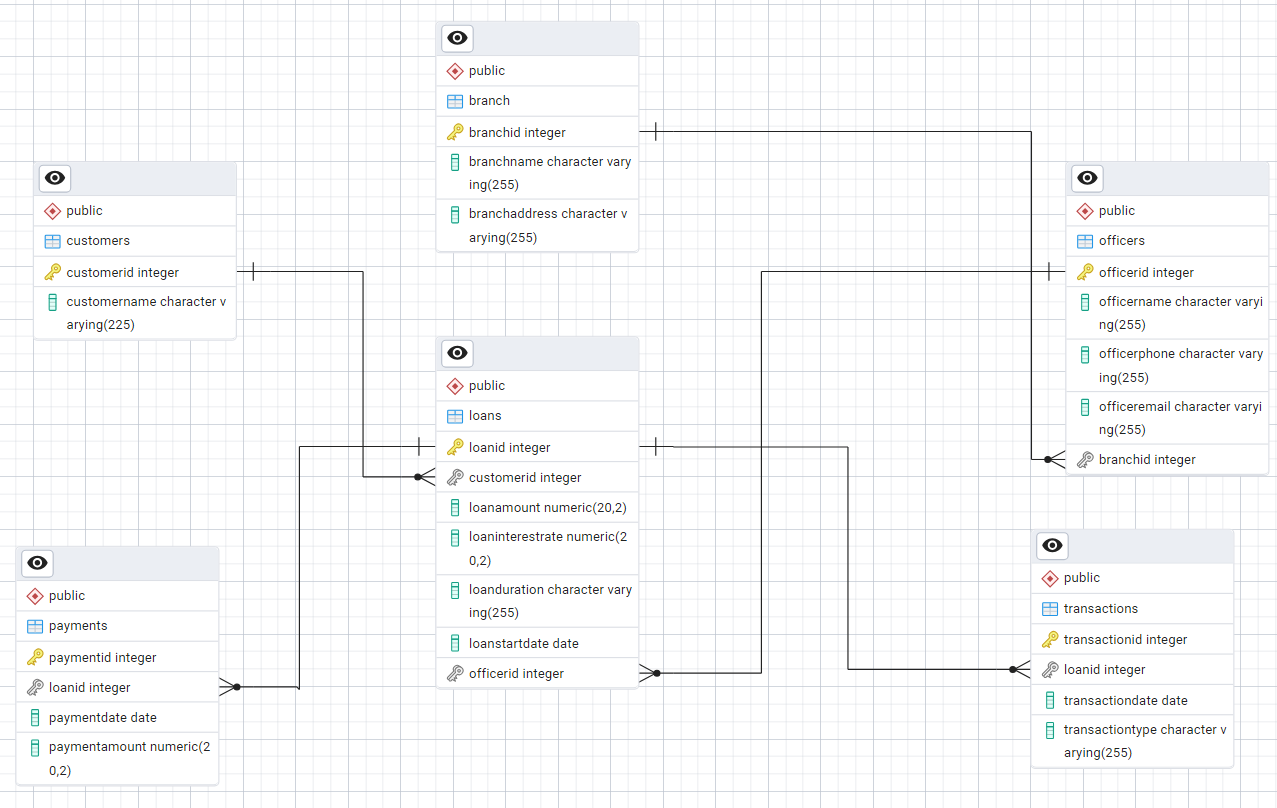

### Save Tables

In [218]:
customers.to_csv(r'E:\10alytics Data Engineering\week 4\lecture\customers.csv',index=False)
loans.to_csv(r'E:\10alytics Data Engineering\week 4\lecture\loans.csv',index=False)
officers.to_csv(r'E:\10alytics Data Engineering\week 4\lecture\officers.csv',index=False)
branch.to_csv(r'E:\10alytics Data Engineering\week 4\lecture\branch.csv',index=False)
payments.to_csv(r'E:\10alytics Data Engineering\week 4\lecture\payments.csv',index=False)
transactions.to_csv(r'E:\10alytics Data Engineering\week 4\lecture\transactions.csv',index=False)

### Insert Records into tables

In [232]:
# insert records in customers table
import csv
def load_records(csv_path):
    conn = db_connected()
    cursor = conn.cursor()
    with open(csv_path, 'r') as file :
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            try:
                cursor.execute(""" insert into customers(CustomerID,CustomerName) values(%s,%s); """ , row)
                
            except psycopg2.IntegrityError:
                conn.rollback()
            else:
                conn.commit()

    conn.commit()
    cursor.close()
    conn.close()
            
load_records(r'E:\10alytics Data Engineering\week 4\lecture\customers.csv')                
print('Records added successfully')               

Records added successfully


In [242]:
# insert records in branch table
import csv
def load_records(csv_path):
    conn = db_connected()
    cursor = conn.cursor()
    with open(csv_path, 'r') as file :
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            try:
                cursor.execute(""" insert into branch(BranchID,BranchName,BranchAddress) values(%s,%s,%s); """ , row)
                
            except psycopg2.IntegrityError:
                conn.rollback()
            else:
                conn.commit()

    conn.commit()
    cursor.close()
    conn.close()
            
load_records(r'E:\10alytics Data Engineering\week 4\lecture\branch.csv')                
print('Records added successfully')               

Records added successfully


In [246]:
# insert records in officers table
import csv
def load_records(csv_path):
    conn = db_connected()
    cursor = conn.cursor()
    with open(csv_path, 'r') as file :
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            try:
                cursor.execute(""" insert into officers(OfficerID,OfficerName,OfficerPhone,OfficerEmail,BranchID )
                values(%s,%s,%s,%s,%s); """ , row)
                
            except psycopg2.IntegrityError:
                conn.rollback()
            else:
                conn.commit()

    conn.commit()
    cursor.close()
    conn.close()
            
load_records(r'E:\10alytics Data Engineering\week 4\lecture\officers.csv')                
print('Records added successfully')               

Records added successfully


In [250]:
# insert records in loans table
import csv
def load_records(csv_path):
    conn = db_connected()
    cursor = conn.cursor()
    with open(csv_path, 'r') as file :
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            try:
                cursor.execute(""" insert into loans(LoanID, CustomerID, LoanAmount, LoanInterestRate, LoanDuration , LoanStartDate, OfficerID )
                values(%s,%s,%s,%s,%s,%s,%s); """ , row)
                
            except psycopg2.IntegrityError:
                conn.rollback()
            else:
                conn.commit()

    conn.commit()
    cursor.close()
    conn.close()
            
load_records(r'E:\10alytics Data Engineering\week 4\lecture\loans.csv')                
print('Records added successfully')               

Records added successfully


In [258]:
# insert records in payments table
import csv
def load_records(csv_path):
    conn = db_connected()
    cursor = conn.cursor()
    with open(csv_path, 'r') as file :
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            try:
                cursor.execute(""" insert into payments(PaymentID ,LoanID, PaymentDate ,PaymentAmount)
                values(%s,%s,%s,%s); """ , row)
                
            except psycopg2.IntegrityError:
                conn.rollback()
            else:
                conn.commit()

    conn.commit()
    cursor.close()
    conn.close()
            
load_records(r'E:\10alytics Data Engineering\week 4\lecture\payments.csv')                
print('Records added successfully')               

Records added successfully


In [262]:
# insert records in transactions table
import csv
def load_records(csv_path):
    conn = db_connected()
    cursor = conn.cursor()
    with open(csv_path, 'r') as file :
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            try:
                cursor.execute(""" insert into transactions(TransactionID, LoanID ,TransactionDate, TransactionType)
                values(%s,%s,%s,%s); """ , row)
                
            except psycopg2.IntegrityError:
                conn.rollback()
            else:
                conn.commit()

    conn.commit()
    cursor.close()
    conn.close()
            
load_records(r'E:\10alytics Data Engineering\week 4\lecture\transactions.csv')                
print('Records added successfully')               

Records added successfully


## Data Visualization

In [289]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [284]:
# let us use library database

con = psycopg2.connect(database = 'alayta_bank',
                        user = 'postgres', 
                        host= 'localhost',
                        password = 'ahly9667',
                        port = 5432)
cur = con.cursor()
query = """select CustomerName , sum(LoanAmount) as total_loans from loans 
inner join customers on customers.CustomerID = loans.CustomerID group by CustomerName
 order by total_loans desc"""
cur.execute(query)
result = cur.fetchall()
dff = pd.DataFrame(result , columns = [i[0] for i in cur.description])
dff

,customername,total_loans
0,Jeremy Arnold,223197.92
1,Ronnie Oconnor,185860.36
2,Eric Dixon,183444.24
3,Lee Richards,183191.45
4,Vicki Moore,175851.67
...,...,...
429,Darren Bender,3615.66
430,Steven Thomas,3303.63
431,Kayla Snyder,3251.43
432,Helen Parker,2028.15


[]

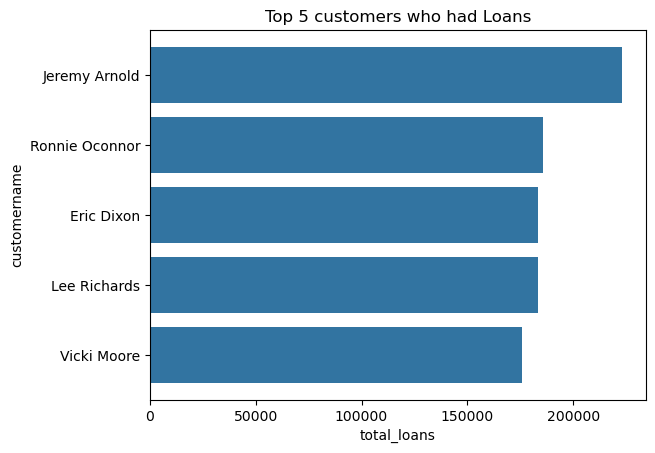

In [305]:
df = dff[:5]
sns.barplot(x = df['total_loans'] , y = df['customername'])
plt.title('Top 5 customers who had Loans')
plt.plot()

[]

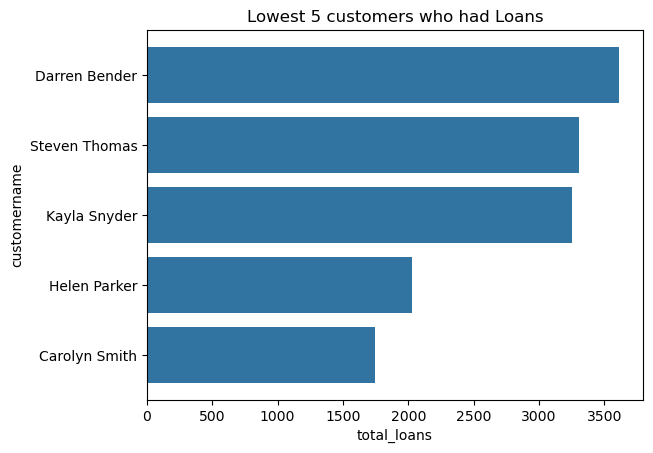

In [303]:
df = dff[-5:]
sns.barplot(x = df['total_loans'] , y = df['customername'])
plt.title('Lowest 5 customers who had Loans')
plt.plot()

In [331]:
# let us use library database

con = psycopg2.connect(database = 'alayta_bank',
                        user = 'postgres', 
                        host= 'localhost',
                        password = 'ahly9667',
                        port = 5432)
cur = con.cursor()
query = """select CustomerName , sum(LoanAmount) as total_loans,TransactionType from transactions
inner join loans on transactions.LoanID  = loans.LoanID  
inner join customers on customers.CustomerID = loans.CustomerID group by CustomerName ,TransactionType
order by total_loans desc"""
cur.execute(query)
result = cur.fetchall()
dff = pd.DataFrame(result , columns = [i[0] for i in cur.description])
dff

,customername,total_loans,transactiontype
0,Mark Sawyer,182461.57,Interest Payment
1,Jeremy Arnold,151839.75,Principal Payment
2,Danny Aguilar,145433.49,Interest Payment
3,Zachary Rios,145417.41,Interest Payment
4,Stacie Jones,139557.40,Loan Payment
...,...,...,...
634,Nicholas Martin,1565.86,Loan Payment
635,Jamie Cervantes,1431.94,Loan Payment
636,Daniel Lewis,1403.24,Principal Payment
637,Michelle Wells,1377.21,Loan Payment


[]

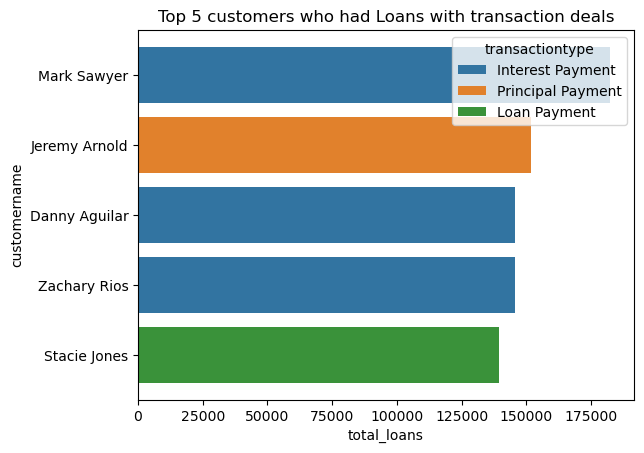

In [333]:
df = dff[:5]
sns.barplot(x = df['total_loans'] , y = df['customername'] , hue = df['transactiontype'])
plt.title('Top 5 customers who had Loans with transaction deals')
plt.plot()

[]

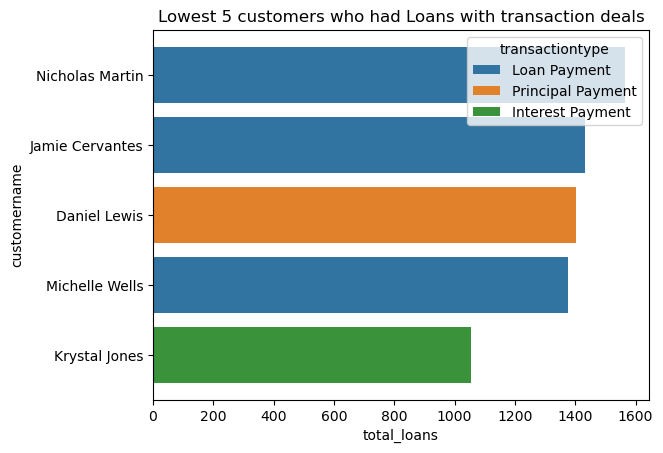

In [337]:
df = dff[-5:]
sns.barplot(x = df['total_loans'] , y = df['customername'] , hue = df['transactiontype'])
plt.title('Lowest 5 customers who had Loans with transaction deals')
plt.plot()

In [343]:
# let us use library database

con = psycopg2.connect(database = 'alayta_bank',
                        user = 'postgres', 
                        host= 'localhost',
                        password = 'ahly9667',
                        port = 5432)
cur = con.cursor()
query = """ select CustomerName ,sum(PaymentAmount) as total_payments from payments
inner join loans on loans.LoanID = payments.LoanID 
inner join customers on loans.CustomerID = customers.CustomerID
group by CustomerName
order by total_payments desc"""
cur.execute(query)
result = cur.fetchall()
dff = pd.DataFrame(result , columns = [i[0] for i in cur.description])
dff

,customername,total_payments
0,William Rivera,17491.64
1,Dr. Heather Melendez MD,15769.49
2,Elizabeth Acosta,14836.03
3,Anthony Brown,14594.32
4,Diana Adams,14309.29
...,...,...
357,Aaron Moss,133.02
358,Sarah Hutchinson,121.85
359,Laura Jacobson,107.43
360,Crystal Hansen,106.37


[]

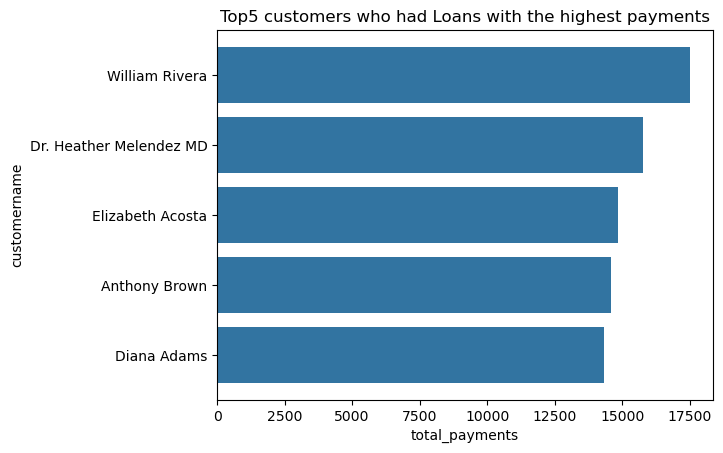

In [350]:
df = dff[:5]
sns.barplot(x = df['total_payments'] , y = df['customername'])
plt.title('Top5 customers who had Loans with the highest payments')
plt.plot()

[]

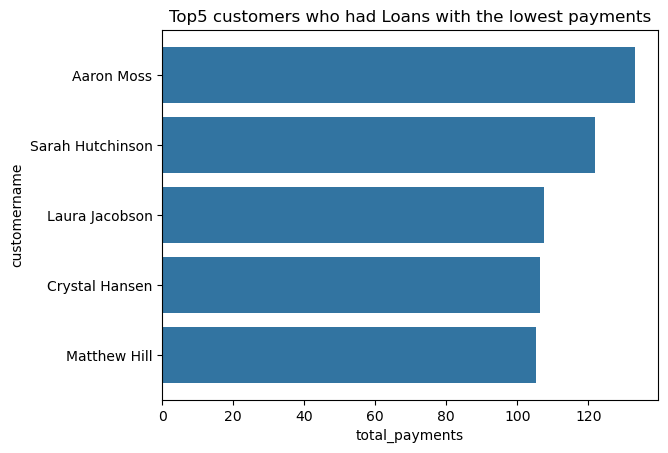

In [354]:
df = dff[-5:]
sns.barplot(x = df['total_payments'] , y = df['customername'])
plt.title('Top5 customers who had Loans with the lowest payments')
plt.plot()

In [366]:
# let us use library database

con = psycopg2.connect(database = 'alayta_bank',
                        user = 'postgres', 
                        host= 'localhost',
                        password = 'ahly9667',
                        port = 5432)
cur = con.cursor()
query = """ select OfficerName,OfficerPhone,OfficerEmail, sum(LoanAmount) as total_loans from officers
inner join loans on loans.OfficerID = officers.OfficerID
group by OfficerName, OfficerPhone, OfficerEmail
order by total_loans desc"""
cur.execute(query)
result = cur.fetchall()
dff = pd.DataFrame(result , columns = [i[0] for i in cur.description])
dff

,officername,officerphone,officeremail,total_loans
0,Kevin Pierce,977-835-8232,rnelson@example.com,778291.78
1,Angela Bennett,+1-242-684-4907,cody43@example.net,754648.64
2,Cindy Miller,(723)391-4392,andrewpowell@example.com,687638.59
3,Mark Santos,584-310-6851x94135,ssmith@example.net,658921.46
4,Louis Anderson,998-773-8272x862,monica08@example.net,634505.70
5,Anita Prince,600.526.3818,ann02@example.net,634244.54
6,Kayla Macdonald,934.461.1157,mhayes@example.net,628201.68
7,Nicole Smith,001-881-298-9566,wellsconnor@example.net,619809.30
8,Stacey Kelley,750.668.1603,uyoung@example.net,610548.74
9,Victor Smith,791-506-7341x6626,jeffreygonzalez@example.com,605340.18


[]

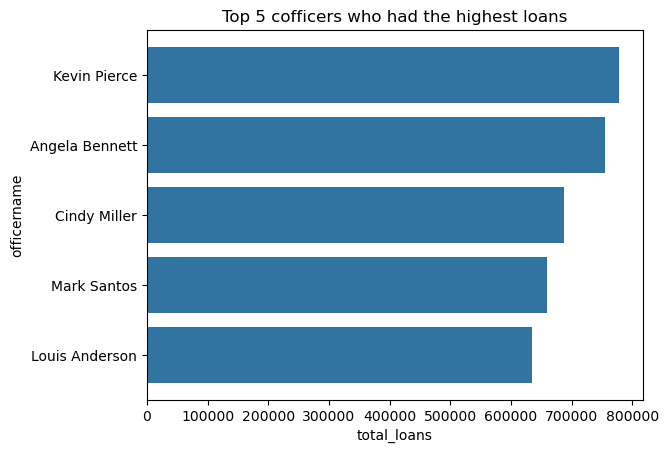

In [372]:
df = dff[:5]
sns.barplot(x = df['total_loans'] , y = df['officername'])
plt.title('Top 5 cofficers who had the highest loans')
plt.plot()

[]

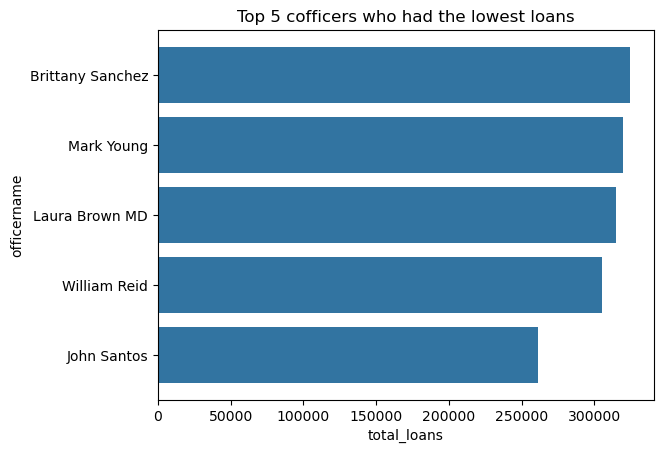

In [376]:
df = dff[-5:]
sns.barplot(x = df['total_loans'] , y = df['officername'])
plt.title('Top 5 cofficers who had the lowest loans')
plt.plot()

In [380]:
# let us use library database

con = psycopg2.connect(database = 'alayta_bank',
                        user = 'postgres', 
                        host= 'localhost',
                        password = 'ahly9667',
                        port = 5432)
cur = con.cursor()
query = """ select officername,BranchName,BranchAddress,sum(LoanAmount) as total_loans from branch
inner join officers on branch.BranchID = officers.BranchID
inner join loans on loans.OfficerID = officers.OfficerID
group by officername,BranchName,BranchAddress
order by total_loans desc"""
cur.execute(query)
result = cur.fetchall()
dff = pd.DataFrame(result , columns = [i[0] for i in cur.description])
dff

,officername,branchname,branchaddress,total_loans
0,Kevin Pierce,Lee Inc,"4965 Zachary Rapid\nOdomfurt, NY 07811",778291.78
1,Angela Bennett,Manning and Sons,"051 Reed Unions Apt. 672\nEast Patrick, LA 63870",754648.64
2,Cindy Miller,"Edwards, Ramirez and Brown","20101 Young Ville\nMatthewview, SC 65448",687638.59
3,Mark Santos,"Barnes, Johnson and Campbell","0519 Shaw Bypass Suite 146\nWadechester, OH 77975",658921.46
4,Louis Anderson,Baker-Ward,USNS Mcdonald\nFPO AP 31813,634505.70
5,Anita Prince,"Boone, Hall and Fernandez","0050 Prince Stream\nMichelletown, VT 17199",634244.54
6,Kayla Macdonald,"Boone, Hall and Fernandez","0050 Prince Stream\nMichelletown, VT 17199",628201.68
7,Nicole Smith,"Perez, James and Cook","475 Lee Trace Suite 096\nPort Derrickside, OH ...",619809.30
8,Stacey Kelley,Palmer-Brown,USCGC Rojas\nFPO AE 47054,610548.74
9,Victor Smith,Baker-Ward,USNS Mcdonald\nFPO AP 31813,605340.18


[]

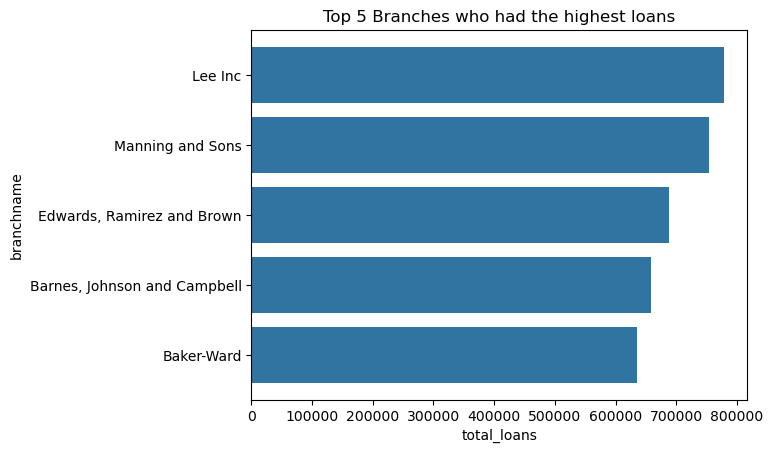

In [382]:
df = dff[:5]
sns.barplot(x = df['total_loans'] , y = df['branchname'])
plt.title('Top 5 Branches who had the highest loans')
plt.plot()

[]

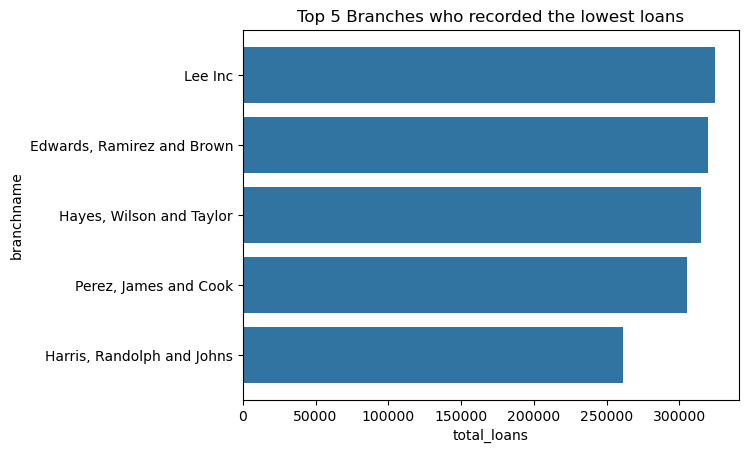

In [384]:
df = dff[-5:]
sns.barplot(x = df['total_loans'] , y = df['branchname'])
plt.title('Top 5 Branches who recorded the lowest loans')
plt.plot()